# Probabilistic Programming Notes

Notes taken from Books:
1. Bayesian Analysis with Python
2. Bayesian Methods for Hackers

## Plot Probability Density Functions
In this case we plot Normal Distributions

Imports

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [2]:
mu_params = [-1, 0, 1]
sd_params = [0.5, 1, 1.5]
x = np.linspace(-7, 7, 100)

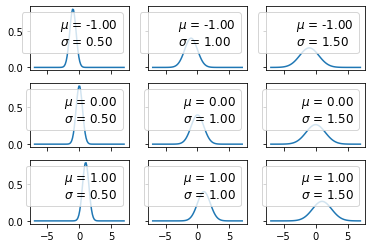

In [5]:
f, ax = plt.subplots(len(mu_params), len(sd_params), sharex=True, sharey=True)
for i in range(3):
    for j in range(3):
        mu = mu_params[i]
        sd = sd_params[j]
        y = stats.norm(mu, sd).pdf(x)
        ax[i, j].plot(x, y)
        ax[i, j].plot(0, 0, label="$\\mu$ = {:3.2f}\n$\\sigma$ = {:3.2f}".format(mu, sd), alpha=0)
        ax[i, j].legend(fontsize=12)

## Bayes Theorem and Statistical Inference

Bayes theorem is as follows:


<center><h1> $p(H \mid D) = \frac{p(D \mid H) p(H)}{p(D)}$ </h1></center>
    
    

According to the product rule, we have the following:

<center> $p(H,D) = p(H \mid D) p(D)$


This can also be written as:
<center> $p(H, D) = p(D \mid H) p(H)$
    

Therefore, we can write the following:

<center> $p(H \mid D) p(D) = p(D \mid H) p(H)$


Now analyzing the previous formula:

- $p(H \mid D)$ is not necessarily the same as $p(D \mid H)$

- $p(H)$ : is the Prior
- $p(D \mid H)$: Is the likelihood
- $p(H \mid D)$: Is the posterior
- $p(D)$: is the Evidence

- __H --> Hypothesis__
- __D --> Data__



1. The __prior distribution__ should reflect what we know about the value of some aprameter before seeing the data __$D$__. If we know nothing about we will use flat priors (uniform distribution) that do not convey too much information. The use of priors is why some people still think Bayesian statistics is subjective, even when priors are just another assumption that we made when modelling and hence are just as subjective as any other assumption

2. The __likelihood__ is how we will introduce data in our analysis. It is an expression of the plausibility of the data given the parameters

3. The __posterior distribution__ is the result of the Bayesian analysis and reflects all that we know about a problem (given our data and model). Is a probability distribution for the parameters in our model and not a single value. This distribution is a balance of the prior and the likelihood.

4. __Evidence__, also known as marginal likelihood. Formally is the probability of observing the data averaged over all the possible values the parameters can take. We will think of it as a simple normalization factor


If we ignore the evidence, we can write Bayes theorem as a proportionality:

<h2><center>$p(H \mid D) \propto p(D \mid H)p(H)$</center><h2>
    
or

<h2><center>$p(A \mid X) \propto p(X \mid A)p(A)$<center><h2>

## The Bayesian State of Mind

- Bayesian differs from more traditional statistical inference by preserving __uncertainty__.

- Beyesian interprets probability as a measure of __believability in an event__ i.e. how confident we are in an event occurring.


### Frequentists
- An alternative interpretation of probability

- Assume that probability is the long-run frequency of events (hence the name) e.g. probability of plane accidents -> long-term frequency of plane accidents

- It is difficult to understan when events have no long-term frequency of occurrences e.g. presidential elections

###  Bayesians

- More intuitive approach

- Bayesians interpret probability as the measure of __belief__ or confidence in an event occuring

- Is the summary of an opinion:

     - Believe of 0: I believe with with absolute certainty that the event will not occur
        
     - Believe of 1: Absolutely certain that the event will occur
        

- A probability (belief) measure is assigned to an __individual__, not to nature.

- The philosophy of treating beliefs as probability is natural to humans. We employ it constantly as we interact with the world
    - We only see partial truths, but gather evidence to form beliefs
    
- To become aligned with traditional probability notation, we denote our belief about event __$A$__ as __$P(A)$__, this called __Prior Probability__

_<center>"When the facts change, I change my mind. What do you do sir?"</center>_

John Maynard Keynes

- The previous quote reflects the way a Bayesian updates his or her beliefs after seeing evidence.

- Specially if the evidence is counter to what was initially believed, the evidence can not be ignored

The update of the belief is denoted as __$P(A \mid X)$__ or __$P(H \mid D)$__

- Probability of $A$ given evidence $X$

- Probability of $H$ given evidence $D$

    - Probability of __Hypothesis__ given __Data evidence__
    - Probability of __Hypothesis__ after observing evidence __D__
    
- The prior belief is not completly dicarded after seeing new evidence __$X$__ or __$D$__

- The prior is __re-weighted__ to incorporate the new evidence, i.e. more confidence (weight) is placed on some beliefs versus others.

- By introducing prior uncertainty about events, we admit that any guess we make is potentially very wrong.

- After observing data (evidence), or other information, the belief is updated and our guess becomes __less wrong__ than before

### Example: Mandatory Coin-Flip

### Example: Librarian or Farmer?

Problem:
- Steve is desribed as a shy individual, very helpful, but he has a little interest in other people. He likes things in their proper order, and is very detailed about his work. Do you think Steve is more likely to be a librarian or a farmer?

Problem work around:
- It may seem that Steve is more likely to be a librarian, and most people would agreee with this conclusion, but that's ignoring the background distribution of librarians and farmers: The ratio of male farmers to male librarians is 20:1.
- Steve is statistically more likely to be a farmer than a librarian now?

Now, given this facts... How can we correct this error? Is Steve actually more likely to be a farmer or librarian now?

To make it simpler, suppose that there are only two professionals, librarians and farmers, and there are indeed 20 times more farmers than librarians

1. Let $A$ denote the event that Steve is a librarian
2. If there is no information about Steve, then $P(A) = 1 / 21 = 0.047$. __This is or Prior__.

Suppose we are given the information about his personality by his neighbor; we will call this information __$X$__

We are interested in __$P(A \mid X)$__, the recalling Bayes Theorem:

<center><h2>$P(A \mid X) = \frac{P(X \mid A) P(A)}{P(X)}$</h2></center>

- We know $P(A)$, but what is $P(X \mid A)$ ???

- __$P(X \mid A)$__, can be defined as the probability of this neighbor's description __given__ Steve is librarian
    - This is how likely the neighbor would be to describe Steve in this way if he is in fact a librarian
    - This probability is very close to 1.0. Let's say __$95$%__ or __$0.95$__

Next is $P(X)$, which __is the chance of someone (anyone) being described in the way the neighbor described Steve__.

This is pretty difficult to estimate in its current form, but we can apply some logical refactoring:


<center> $P(X) = P(X and A) + P(X and \sim A)$ </center>

<center> $P(X) = P(X \mid A)P(A) + P(X \mid \sim A)P(\sim A)$ </center>


- where $\sim A$ means that Steve is __not__ a librarian, and thus is a farmer.

- So we know
    - $P(X \mid A)$ and,
    - $P(\sim A) = 1 - P(A) = 20/21$


Now we just need $P(X \mid \sim A)$, the probability of a neighbor describing Steve as $X$, given he is a farmer
-  Let's say this is $0.5$
- Thus, $P(X) = 0.95*(1/21) + (0.5)*(20/21) = 0.52$
- Combining everything:

<center><h2>$P(A \mid X) = \frac{0.951/21}{0.52} = 0.087$</h2></center>


This is not very high, but considering how many more farmers there are than librarians, is does seem logical.

Next, we compare posterior probabilities of Steve being a librarian and Steve being a farmer

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

In [8]:
figsize(12.5, 4)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
colors = ["#348ABD", "#A60628"]

In [9]:
prior = [1/21., 20/21.]
posterior = [0.0817, 1-0.0817]

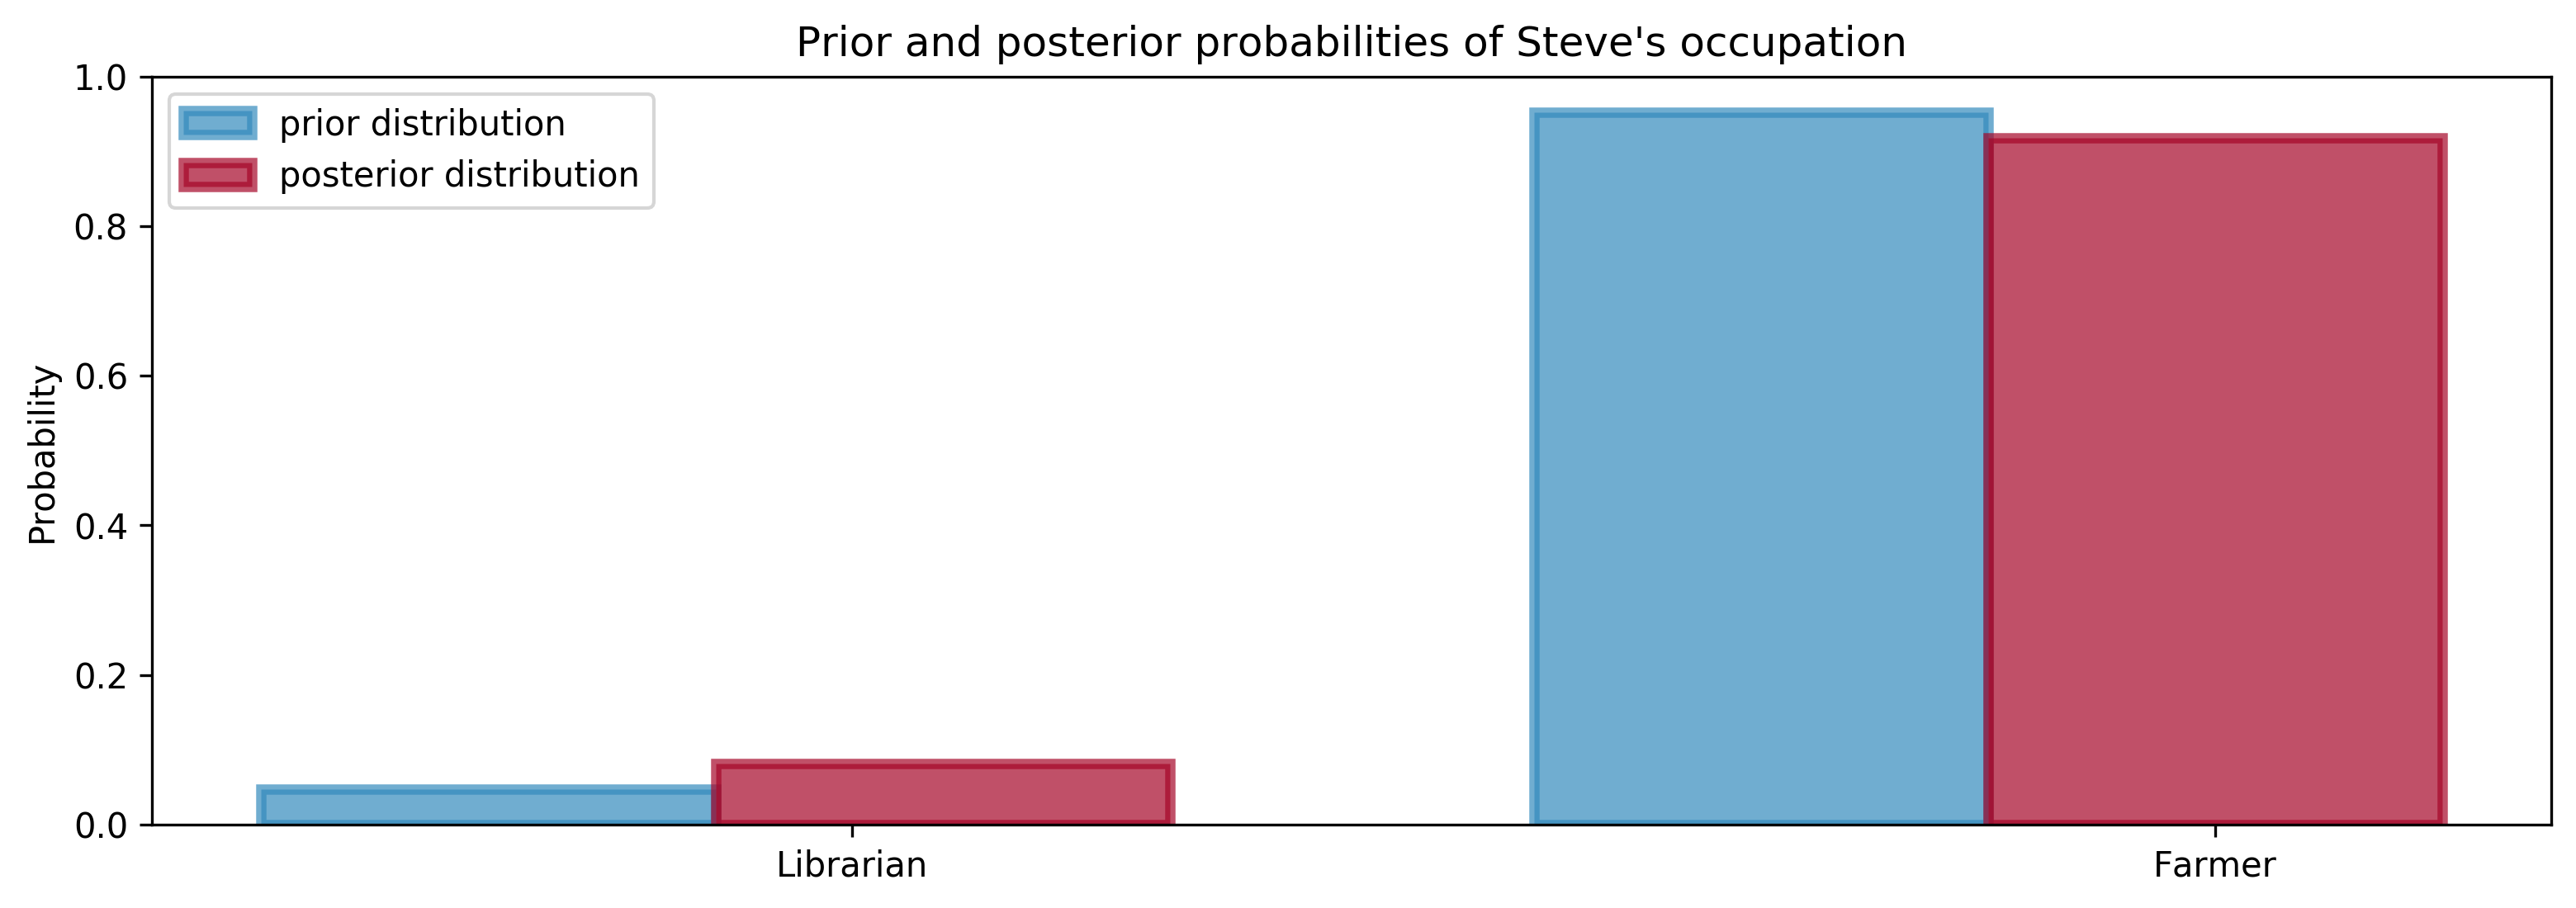

In [11]:
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colors[0], label="prior distribution",
        lw="3", edgecolor="#348ABD")

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
     width=0.25, color=colors[1],
     label="posterior distribution",
     lw="3", edgecolor="#A60628")
    
plt.xticks([0.20, 0.95], ["Librarian", "Farmer"])
plt.title("Prior and posterior probabilities of Steve's occupation")
plt.ylabel("Probability")
plt.legend(loc="upper left")
plt.show()

Notice that after we observed the evidence (information) $X$, the probability of Steve being a librarian increased, though not by much, is still everwhelmingly likely that Steve is a farmer.

### Probability Distributions

#### Discrete Case: Poisson Distribution

In [12]:
figsize(12.5, 4)

In [14]:
import scipy.stats as stats

Text(0.5, 1.0, 'Probability mass function oa Poisson random variable,           different $\\lambda$ values')

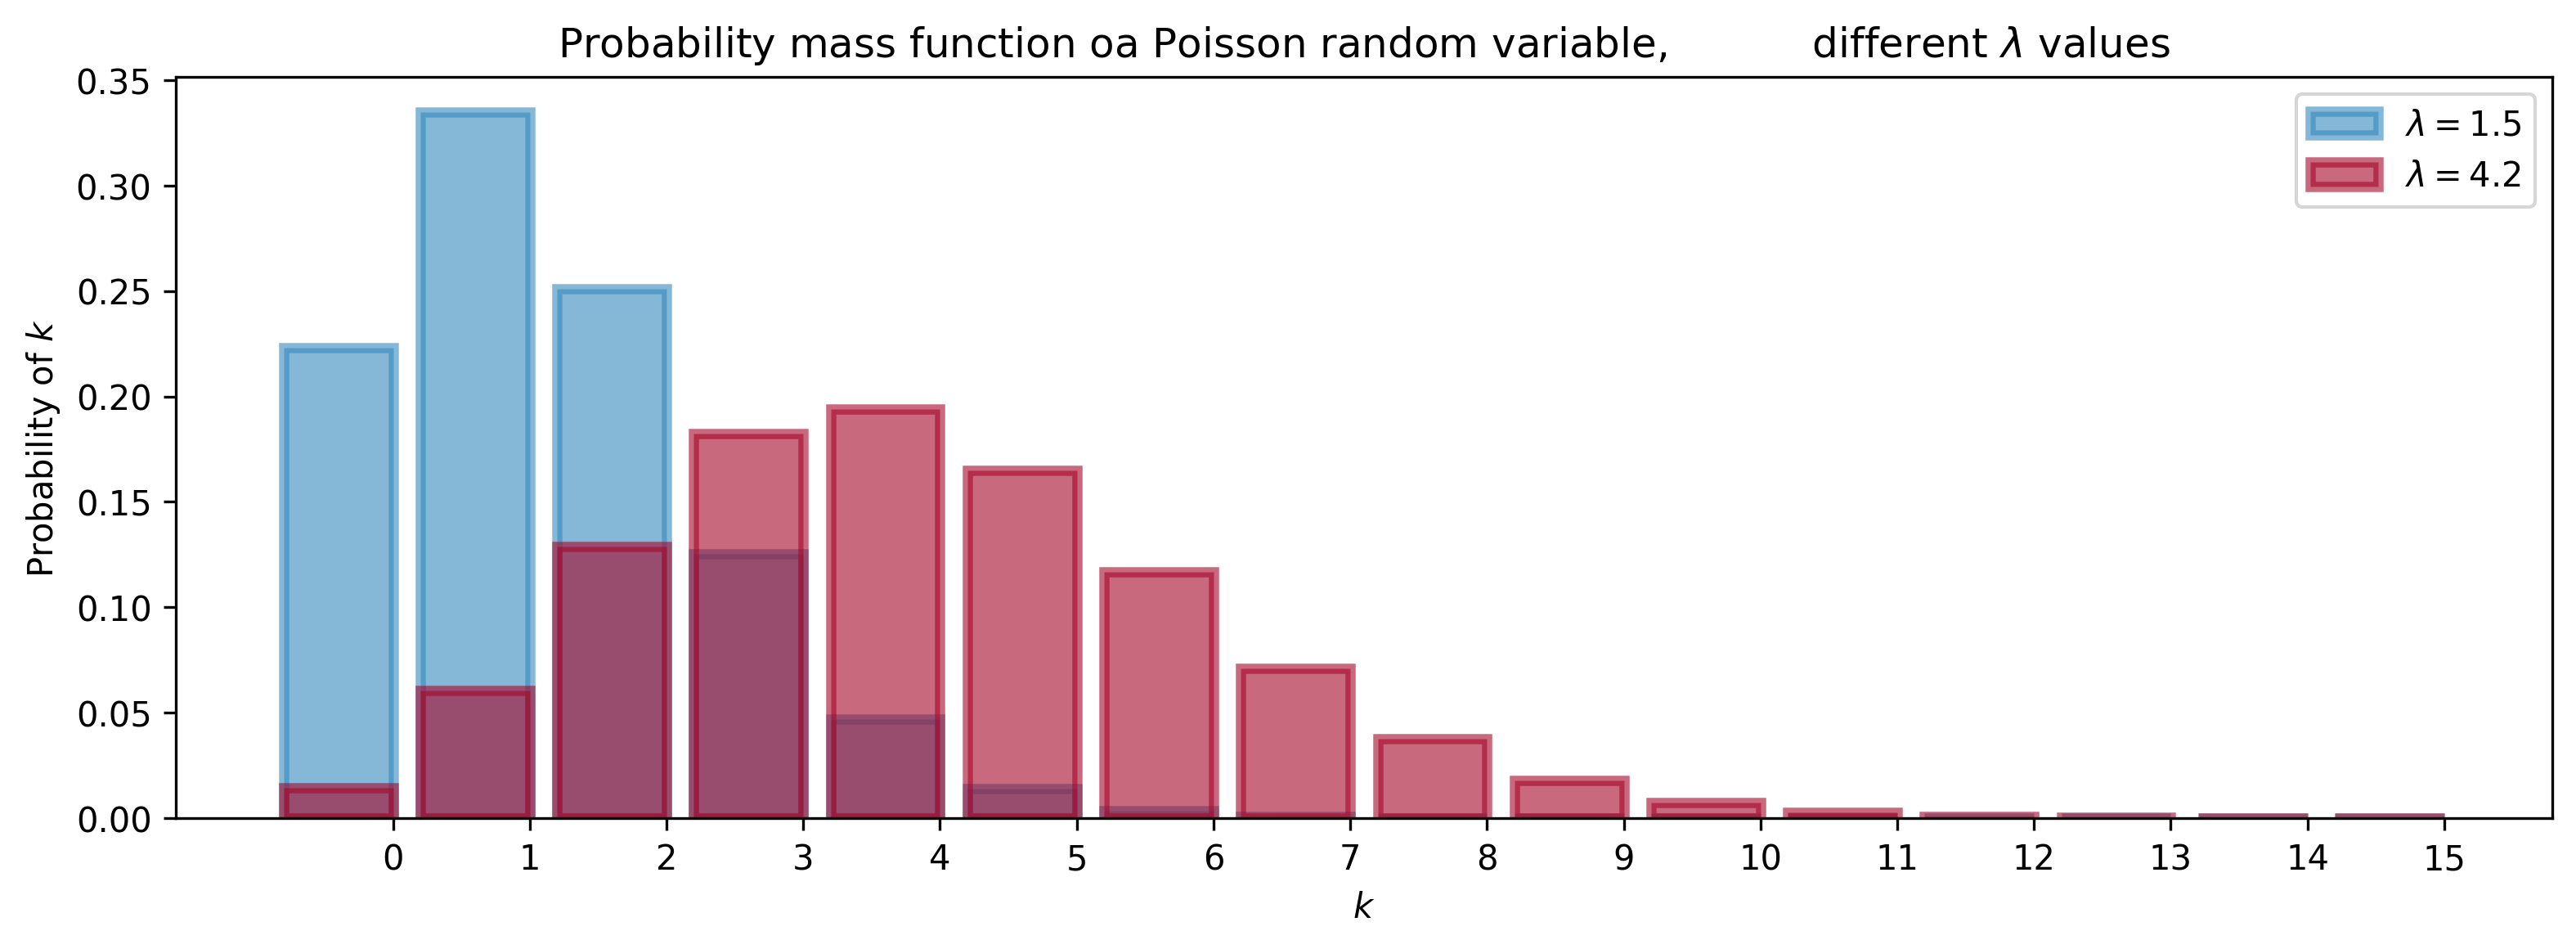

In [18]:
a  = np.arange(16)

poi = stats.poisson

lambda_val = [1.5, 4.25]

colors = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_val[0]), color=colors[0],
        label="$\lambda = %.1f$" % lambda_val[0],
        alpha=0.60, edgecolor=colors[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_val[1]), color=colors[1],
        label="$\lambda = %.1f$" % lambda_val[1],
        alpha=0.60, edgecolor=colors[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("Probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function oa Poisson random variable,\
           different $\lambda$ values")

#### Continuous Case: Exponential Distribution

Text(0.5, 1.0, 'Probability density function of an exponential random           variable, different $\\lambda$ values')

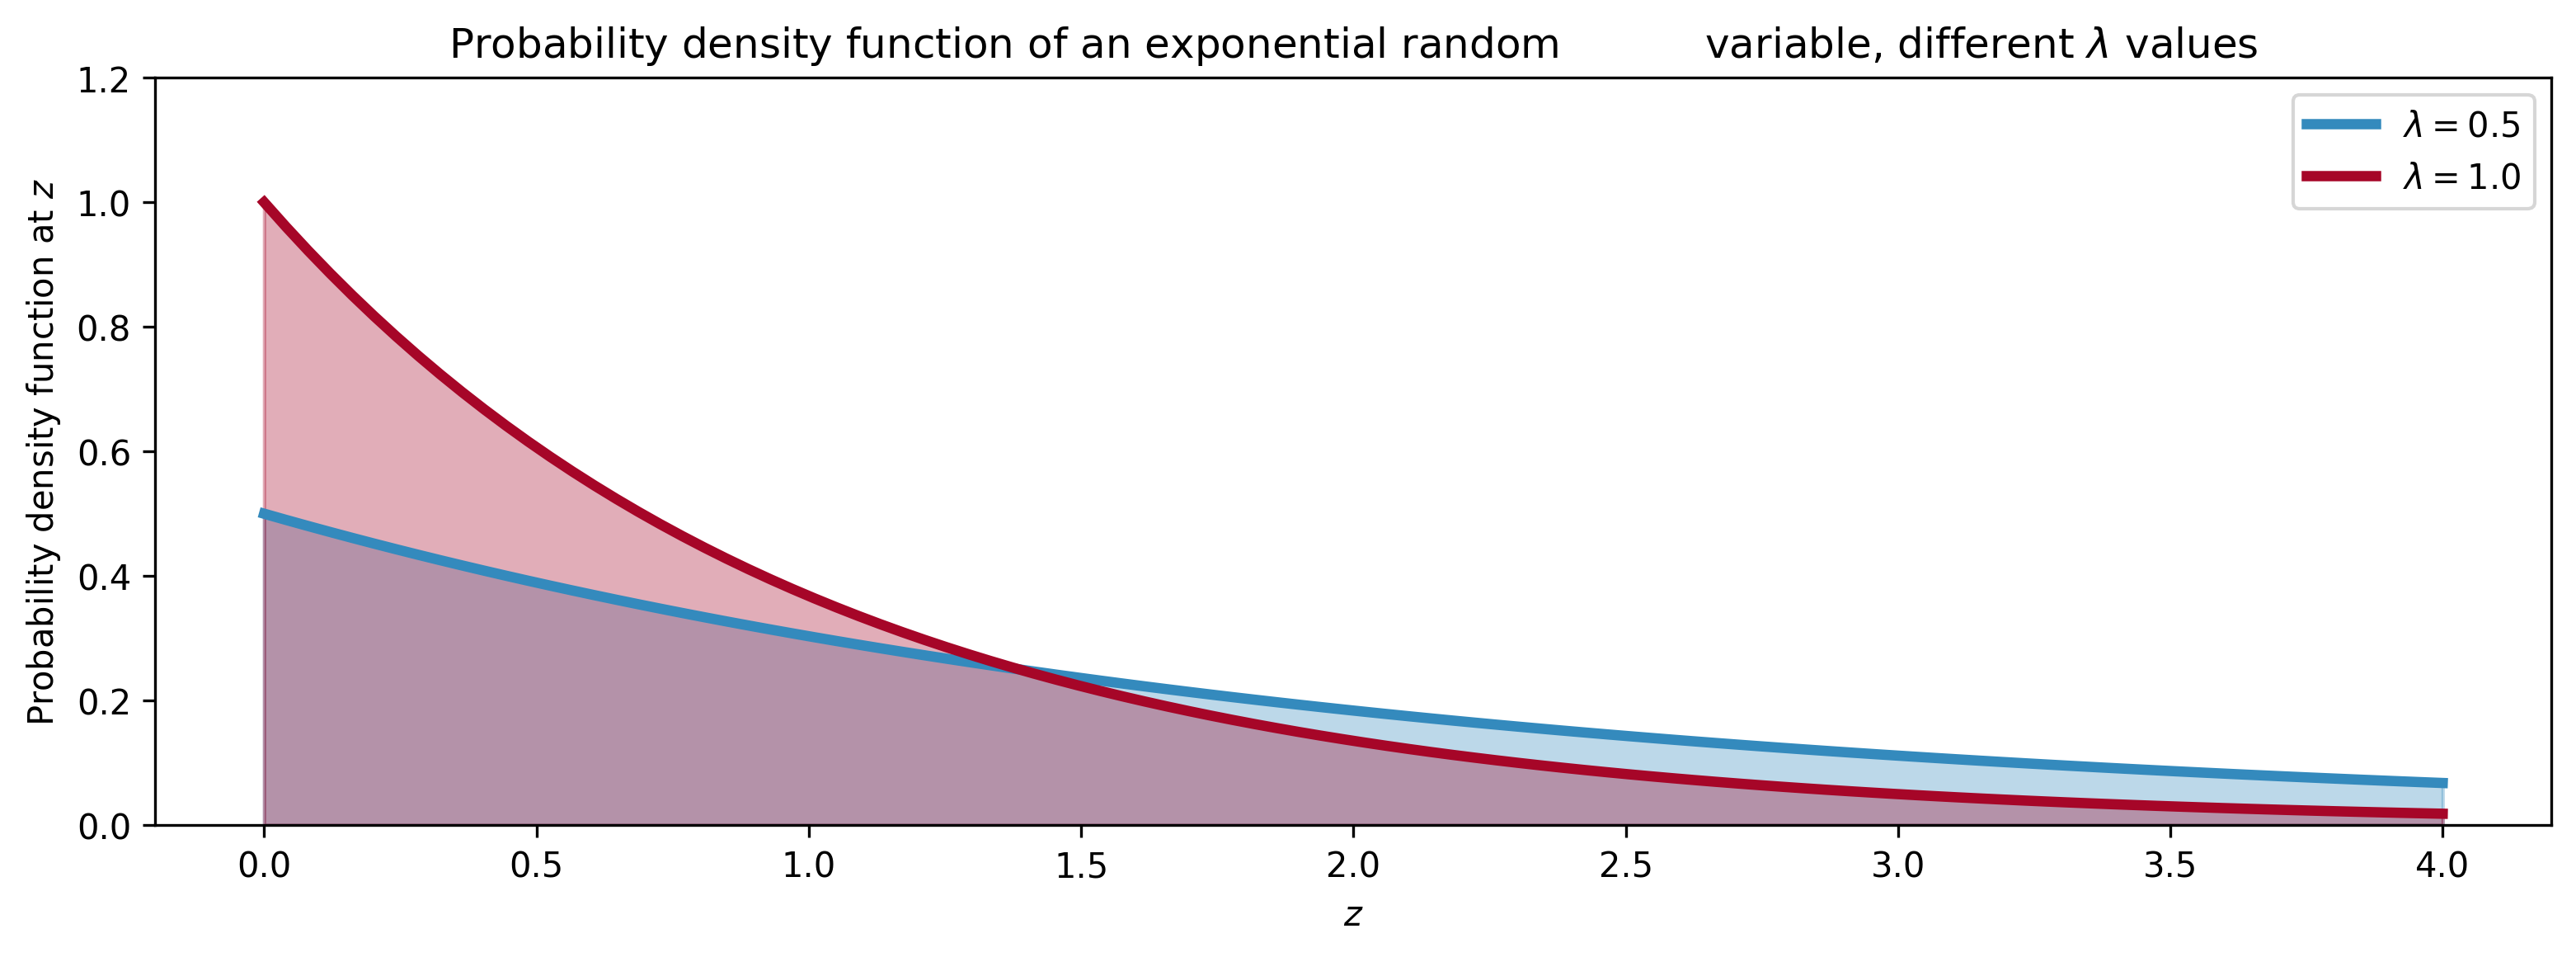

In [20]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_val = [0.5, 1]


for l, c in zip(lambda_val, colors):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)


plt.legend()
plt.ylabel("Probability density function at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an exponential random\
           variable, different $\lambda$ values")